# Travail pratique 05 – Régression linéaire

## 1 Régression linéaire simple

### 1.2 Création d' un notebook pour lire la base de données «Boston housing dataset »

In [1]:
#variables globales
fsize_title = 16
fsize_axes = 14
figsize = (14,8)
edge = "black"
color= "dodgerblue"

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    X, y = load_boston(return_X_y=True)
    b = load_boston()

bdf = pd.DataFrame(b.data, columns=b.feature_names)
# Il faut renommmer la dernière colonne
bdf['MEDV'] = pd.Series(b.target)
# Affichage du dataframe

### 1.3 Se familiariser avec la base de données

p.ex., nombre d’observations, des classes, d’attributs, statistiques des attributs, données manquantes. Générez un
histogramme de la distribution de la variable indépendente.

In [3]:
#Afficher le contenu du dataframe généré
bdf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
bdf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
# Afficher la descritpion des données
print(b.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
dataNb = len(bdf.index)
print("Nombre de d'objets dans le dataset (lignes) : ", dataNb)
cols = list(bdf)

print("Nombre d'attributs (colonnes) dans le dataset: ", len(cols))
print("Logiquement nous devrions avoir", len(cols), " * ", dataNb, " éléments = ", len(cols) * dataNb)
print("Nombre actuel d'éléments: ", bdf.size)
print ("On peut en conclure qu'il n'y a as de données manquantes")

Nombre de d'objets dans le dataset (lignes) :  506
Nombre d'attributs (colonnes) dans le dataset:  14
Logiquement nous devrions avoir 14  *  506  éléments =  7084
Nombre actuel d'éléments:  7084
On peut en conclure qu'il n'y a as de données manquantes


#### 1.3.1 Analyse de la description

Selon la description, il y a 506 records pour 14 attributs et aucune données manquantes. Nous pouvons voir que c'est bien le cas. Notre dataFrame contient bien 14 colonnes, 506 lignes, et aucune colonne n'a de valeurs manquantes

Nous allons maintenant étudier la répartition des données avec un histogramme sur la variable MEDV (demandé dans la consigne) et des boxplots pour toutes les autres variables pour avoir un bel overview

#### 1.3.2 Répartition de la variable MEDV

Text(0, 0.5, 'Prix médian des maisons (x1000$)')

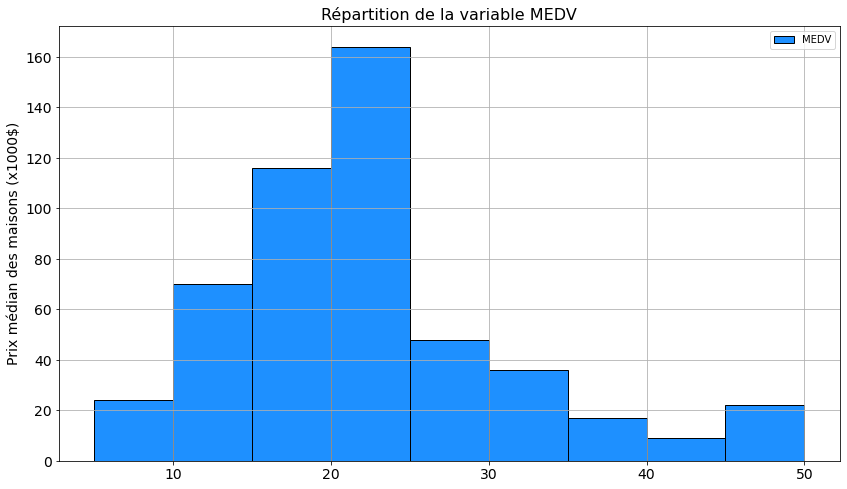

In [7]:
#afficher la répartition de la variable MEDV

#Nous avons utilisé 9 bins pour être "calqué" sur les axes
bdf["MEDV"].hist(bins = 9, figsize=figsize, xlabelsize=fsize_axes,
                 legend=True, ylabelsize=14, color=color, edgecolor=edge)
plt.title("Répartition de la variable MEDV", fontsize=fsize_title)
plt.ylabel("Prix médian des maisons (x1000$)", fontsize=fsize_axes)

### 1.4 Visualiser des boxplots des variables MEDV, RM, LSTAT, RAD, DIS et AGE.

Text(0.5, 0.98, 'Boxplots des variables MEDV, RM, LSTAT, RAD, DIS et AGE')

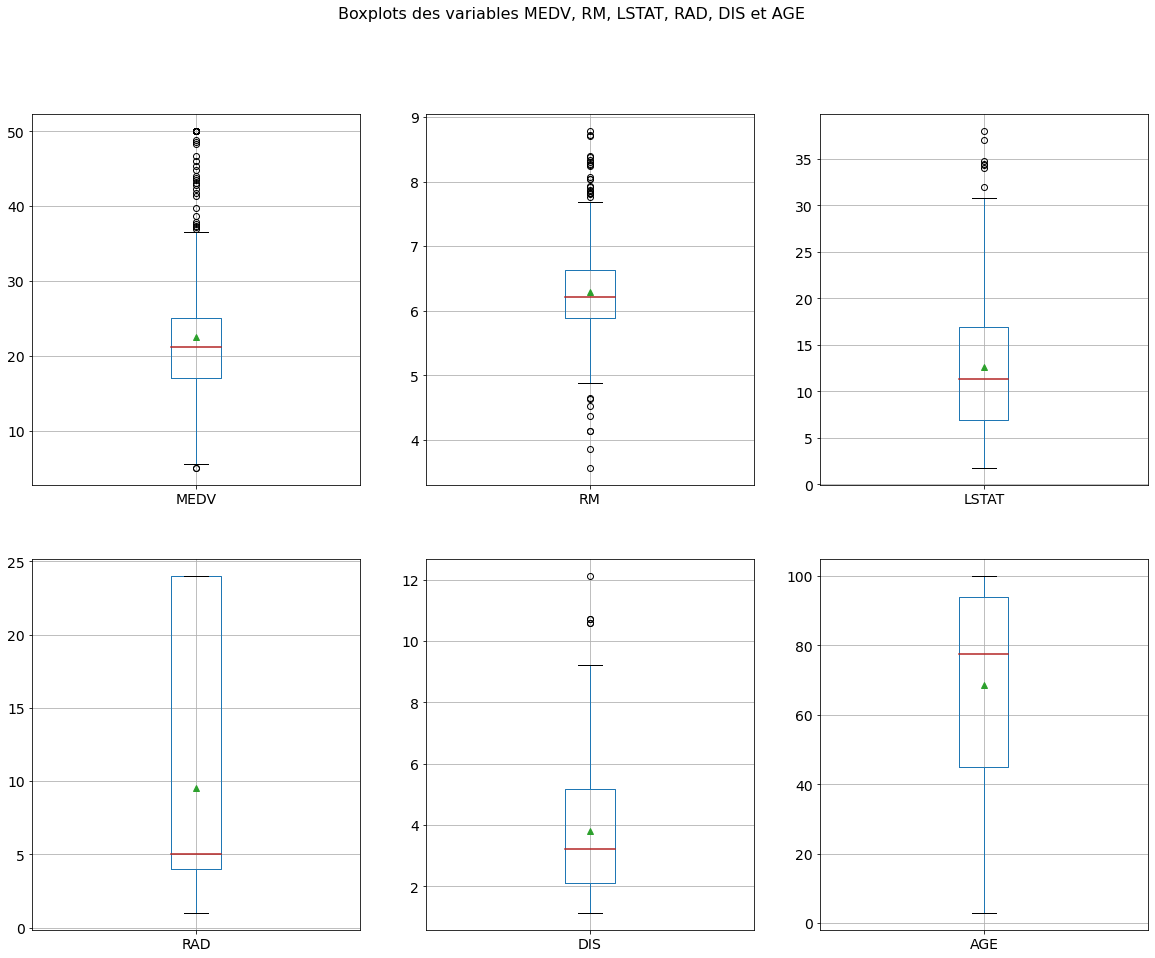

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
labels = ['MEDV', 'RM', 'LSTAT', 'RAD', 'DIS', 'AGE']

for i,lab in enumerate(labels):
    bdf.boxplot(lab, ax=axes[i // 3, i % 3], showmeans=True, fontsize=fsize_axes,
                medianprops = dict(linewidth=1.5, color='firebrick'))

fig.suptitle("Boxplots des variables MEDV, RM, LSTAT, RAD, DIS et AGE", fontsize=fsize_title)

### 1.5 Créez des modèles en utilisant l’algorithme de régression linéaire simple

estimer la valeur MEDV à partir des variables RM, RAD et LSTAT, chaque fois utilisant seulement une des variables.
Programmez les fonctions pour faire une validation hold-out (e.g., 80% train + 20% test x 100 fois) et pour calculer le coefficient de détermination afin d’évaluer la performance moyenne du modèle. Commentez vos résultats.

In [9]:
#Fonctions pour la régression linéaire

def compute_MSE(b,m,data):
    totalError = 0   # Mean squared error formula
    for i in range (0, len(data)):
        x = data[i, 0] # variable indépendante
        y = data[i, 1] # variable dépendante
        totalError += (y-(m*x + b)) ** 2 # somme des différences au carré
    return totalError / float(len(data)) # on divise par N

def step_gradient(b_current, m_current, data, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(data))
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        b_gradient += -(1/N) * (y - (m_current * x + b_current))
        m_gradient += -(1/N) * x * (y - (m_current * x + b_current))
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b, new_m]

def gradient_descent(data, starting_b, starting_m, learning_rate, num_epochs):
    b = starting_b
    m = starting_m
    for i in range(num_epochs):
        b, m = step_gradient(b, m, np.array(data), learning_rate)
    return [b, m]

#### 1.5.1 Afficher les graphiques de la régression linéaire

In [13]:
def printRegression(data, learningRate, epochs):
    initB = np.random.rand(1)
    initM = np.random.rand(1)
    error = compute_MSE(initB, initM, data)
    [b, m] = gradient_descent(data, initB, initM, learningRate, epochs)
    x = np.linspace(min(data[:, 0]), max(data[:, 0]))
    print(x)
printRegression(bdf[['RM', 'MEDV']].to_numpy(),0.0001, 50)

[3.561      3.6675102  3.77402041 3.88053061 3.98704082 4.09355102
 4.20006122 4.30657143 4.41308163 4.51959184 4.62610204 4.73261224
 4.83912245 4.94563265 5.05214286 5.15865306 5.26516327 5.37167347
 5.47818367 5.58469388 5.69120408 5.79771429 5.90422449 6.01073469
 6.1172449  6.2237551  6.33026531 6.43677551 6.54328571 6.64979592
 6.75630612 6.86281633 6.96932653 7.07583673 7.18234694 7.28885714
 7.39536735 7.50187755 7.60838776 7.71489796 7.82140816 7.92791837
 8.03442857 8.14093878 8.24744898 8.35395918 8.46046939 8.56697959
 8.6734898  8.78      ]


### 1.6 Explorez les hyper-paramètres : learning_rate et nombre d’epochs

Calculez la performance moyenne (c.a.d., la moyenne de x100 fois le coefficient de détermination calculé sur le test set) du meilleur modèle trouvé par validation hold-out. Indiquez la valeur des hyper-paramètres qui donnent les meilleurs résultats et la meilleure performance trouvée. Générez un scatter-plot affichant les données (variable indépendante, variable dépendante) et la ligne droite trouvée par régression linéaire. (Note : la variable dépendante
est MEDV).